In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from collections import Counter
import ast  # To safely evaluate the string representation of a list

In [2]:
# Data directory
SOURCE_DATA_PATH = './data/'

In [3]:
# Load recipes
raw_recipes_df = pd.read_csv(os.path.join(SOURCE_DATA_PATH, 'RAW_recipes.csv'))
# Load interactions
raw_interactions_df = pd.read_csv(os.path.join(SOURCE_DATA_PATH, 'RAW_interactions.csv'))

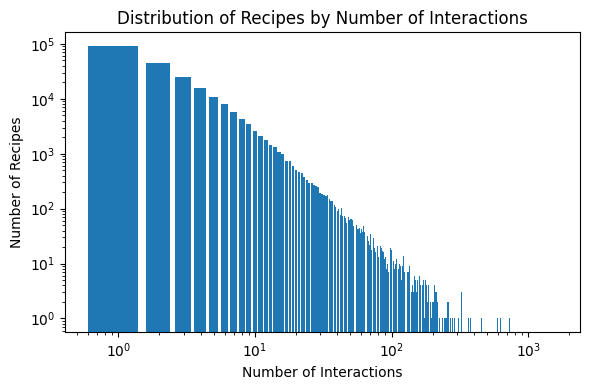

In [14]:
# Calculate the number of interactions (reviews) per recipe
interactions_per_recipe = raw_interactions_df.groupby('recipe_id').size()
# Count how many recipes have each specific count of interactions
recipes_per_interaction_count = interactions_per_recipe.value_counts()
# Sort by interaction count for a better visualization
recipes_per_interaction_count = recipes_per_interaction_count.sort_index()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(recipes_per_interaction_count.index, recipes_per_interaction_count.values)
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Recipes by Number of Interactions')
plt.yscale('log')  # Set the y-axis to log scale
plt.xscale('log')
plt.tight_layout()
plt.savefig('plots/recipes_by_interactions.png')
plt.show()

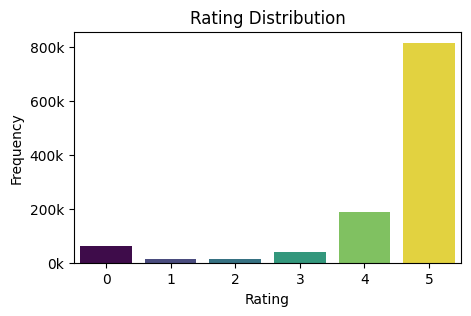

In [5]:
# Analyze rating distribution
rating_distribution = raw_interactions_df['rating'].value_counts().sort_index()

# Plot the rating distribution
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis', hue=rating_distribution.index, legend=False)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%1.0fk' % (x * 1e-3)))
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(len(rating_distribution.index)), rating_distribution.index)
plt.savefig('plots/rating_distribution.png', bbox_inches='tight')
plt.show()

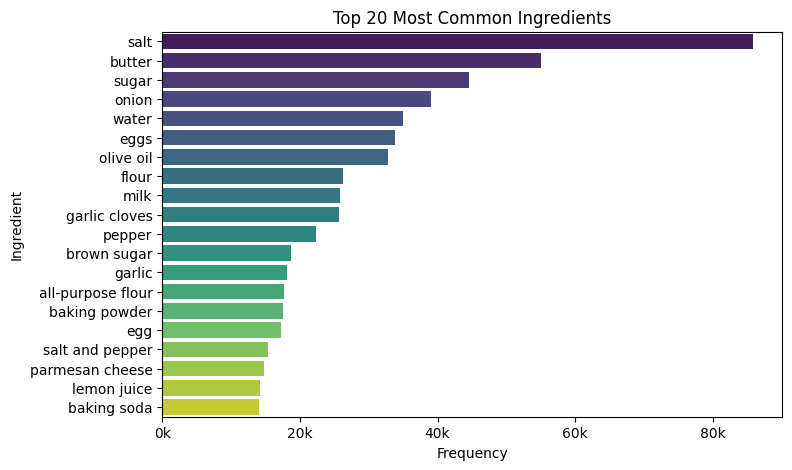

In [6]:
# Assuming 'ingredients' column is stored as a string representation of a list
# Convert the string representation of the list to an actual list
raw_recipes_df['ingredients_list'] = raw_recipes_df['ingredients'].apply(ast.literal_eval)

# Flatten the list of all ingredients into a single list
all_ingredients = [ingredient for sublist in raw_recipes_df['ingredients_list'] for ingredient in sublist]

# Count the frequency of each ingredient
ingredient_counts = Counter(all_ingredients)

# Convert the ingredient counts into a DataFrame for easier analysis and plotting
ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the top 20 most common ingredients
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Frequency', y='Ingredient', data=ingredient_counts_df.head(20), palette='viridis', hue='Ingredient', legend=False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%1.0fk' % (x * 1e-3)))
plt.title('Top 20 Most Common Ingredients')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.savefig('plots/top_20_ingredients.png', bbox_inches='tight')
plt.show()

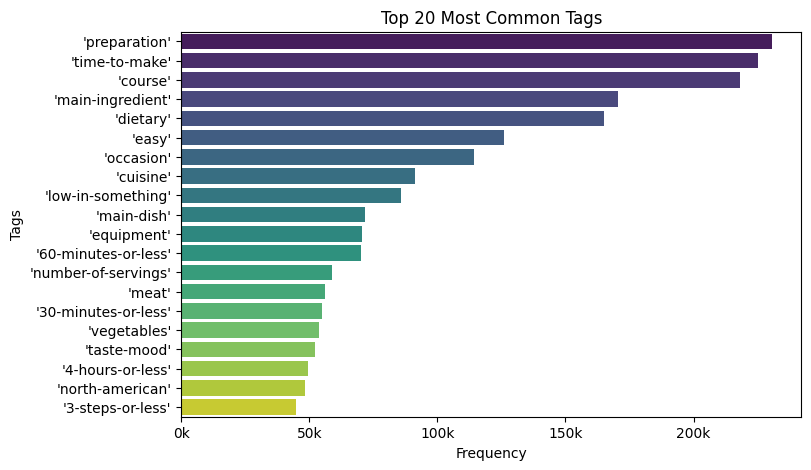

In [7]:
# Example assuming tags are separated by commas and enclosed in brackets
raw_recipes = raw_recipes_df.copy()
raw_recipes['tags'] = raw_recipes_df['tags'].apply(lambda x: x.strip("[]").split(', '))

# Flatten the list of lists into a single list of tags
all_tags = [tag for sublist in raw_recipes['tags'] for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Convert to a DataFrame for easier plotting
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Plot the most common tags
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Frequency', y='Tag', data=tag_counts_df, palette='viridis', hue='Tag', legend=False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%1.0fk' % (x * 1e-3)))
plt.title('Top 20 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.savefig('plots/top_20_tags.png', bbox_inches='tight')
plt.show()

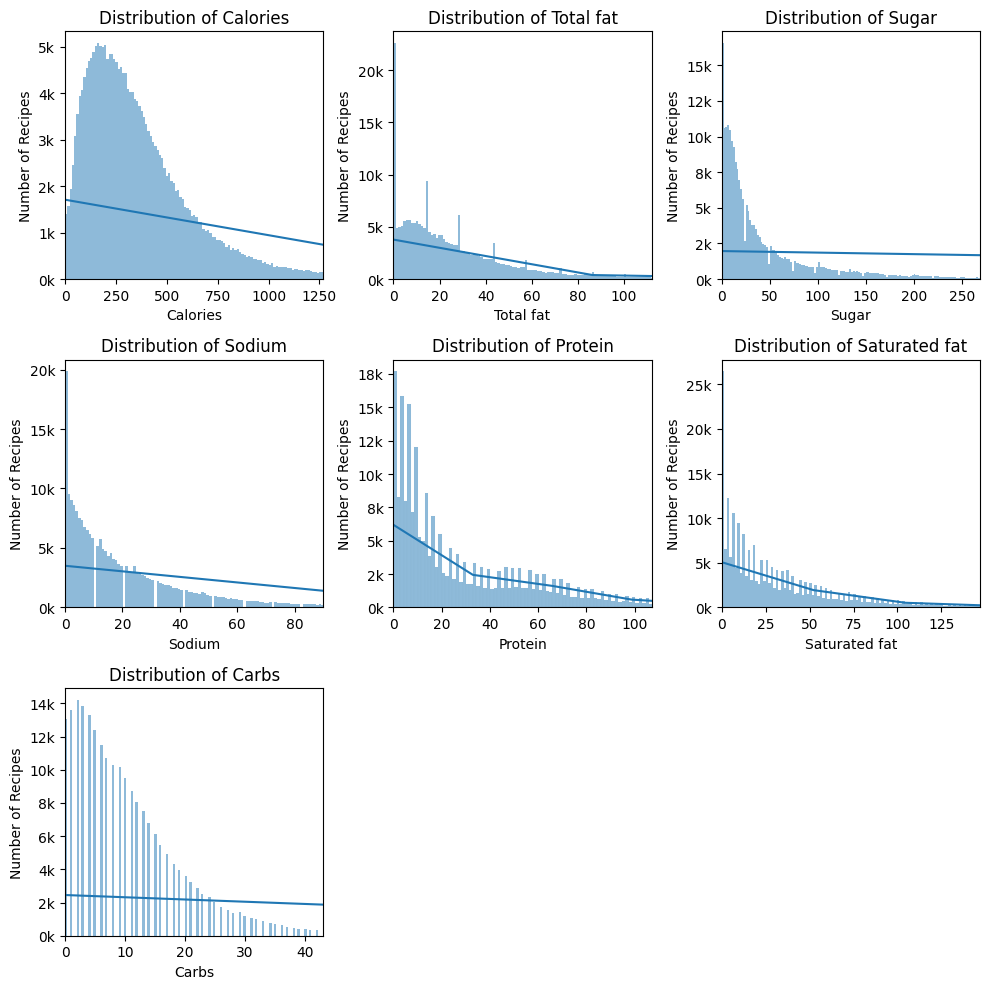

In [11]:
# Convert the 'nutrition' column from string to actual lists
recipes_df = raw_recipes_df.copy()
recipes_df['nutrition'] = recipes_df['nutrition'].apply(ast.literal_eval)

# Create separate columns for each nutritional element
nutritional_elements = ['calories', 'total Fat', 'sugar', 'sodium', 'protein', 'saturated Fat', 'carbs']
for i, elem in enumerate(nutritional_elements):
    recipes_df[elem] = recipes_df['nutrition'].apply(lambda x: x[i])

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.flatten()  # Flatten the axis array for easy iteration

# Remove the last axes if we have less than 9 nutritional elements
for i in range(len(nutritional_elements), len(ax)):
    fig.delaxes(ax[i])

# Plot each nutritional element
for i, elem in enumerate(nutritional_elements):
    sns.histplot(recipes_df[elem], ax=ax[i], kde=True)
    ax[i].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%1.0fk' % (x * 1e-3)))
    ax[i].set_title(f'Distribution of {elem.capitalize()}')
    ax[i].set_xlabel(f'{elem.capitalize()}')
    ax[i].set_ylabel('Number of Recipes')
    ax[i].set_xlim(0, recipes_df[elem].quantile(0.95))  # Limiting to 95th percentile for better visualization

# Adjust layout for readability
plt.tight_layout()
plt.savefig('plots/nutritional_elements_distribution.png', bbox_inches='tight')
plt.show()